In [1]:
using Robotics
using Plots
using Images
pyplot()

┌ Info: Precompiling Robotics [facd5b7b-9aee-4b35-b3b8-a081b31a0ace]
└ @ Base loading.jl:1242
┌ Info: Skipping precompilation since __precompile__(false). Importing Robotics [facd5b7b-9aee-4b35-b3b8-a081b31a0ace].
└ @ Base loading.jl:1017


Plots.PyPlotBackend()

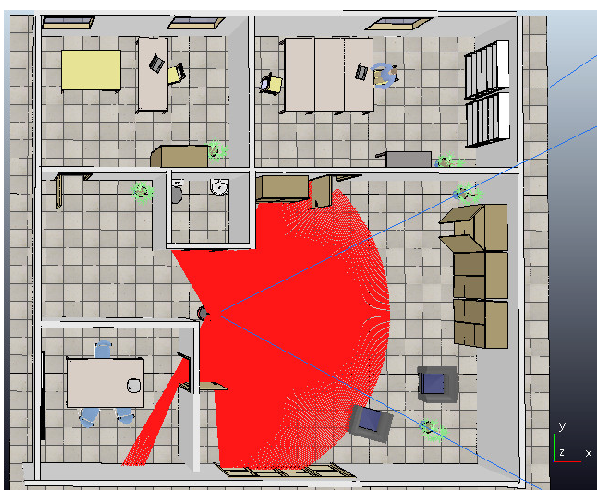

In [2]:
scene_img = load("scene_laser.jpg")

plot(scene_img, size=(600, 500),
    ticks=nothing, border=:none)

In [3]:
reset_simulation()

robot = Robot()

Simulation stopped...
Simulation started...
Connected to remoteApi server.
Pioneer_p3dx_ultrasonicSensor1 connected.
Pioneer_p3dx_ultrasonicSensor2 connected.
Pioneer_p3dx_ultrasonicSensor3 connected.
Pioneer_p3dx_ultrasonicSensor4 connected.
Pioneer_p3dx_ultrasonicSensor5 connected.
Pioneer_p3dx_ultrasonicSensor6 connected.
Pioneer_p3dx_ultrasonicSensor7 connected.
Pioneer_p3dx_ultrasonicSensor8 connected.
Pioneer_p3dx_ultrasonicSensor9 connected.
Pioneer_p3dx_ultrasonicSensor10 connected.
Pioneer_p3dx_ultrasonicSensor11 connected.
Pioneer_p3dx_ultrasonicSensor12 connected.
Pioneer_p3dx_ultrasonicSensor13 connected.
Pioneer_p3dx_ultrasonicSensor14 connected.
Pioneer_p3dx_ultrasonicSensor15 connected.
Pioneer_p3dx_ultrasonicSensor16 connected.
Laser connected.
Vision sensor connected.
Left motor connected.
Right motor connected.
Robot connected.


Robot(0, Int32[328, 327, 326, 325, 324, 323, 322, 321, 336, 335, 334, 333, 332, 331, 330, 329], 348, 355, Dict(:left => 311,:right => 308), 307, 0.381f0, 0.0975f0)

In [4]:
sonar_data = read_sonar(robot)

@show(sonar_data)
println(length(sonar_data))

sonar_data = Float32[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 0.5884704, 0.45964417, 0.44564816, 5.0, 5.0, 5.0, 5.0]
16


In [5]:
laser_data = read_laser(robot)

@show(laser_data[1:10])
println(length(laser_data))

laser_data[1:10] = Float32[-2.4147892, -4.182538, 0.06299996, -2.3826272, -4.1859975, 0.06299996, -2.3510256, -4.190132, 0.06299995, -2.3107052]
1239


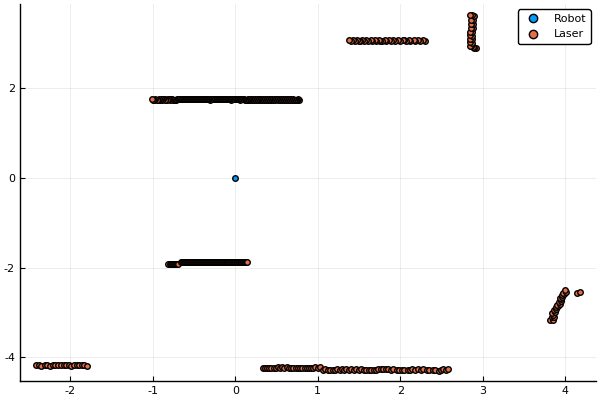

In [6]:
indices_X = 1:3:length(laser_data)
indices_Y = 2:3:length(laser_data)

laser_X = laser_data[indices_X]
laser_Y = laser_data[indices_Y]

scatter([0], [0], label="Robot")
scatter!(laser_X, laser_Y, label="Laser")

In [7]:
x, y, θ = pose2D(robot)

(-2.0253348f0, -0.8249857f0, -1.9458992f-5)

In [8]:
T = T_r2g(x, y, θ)

3×3 Array{Float64,2}:
  1.0        1.9459e-5  -2.02533 
 -1.9459e-5  1.0        -0.824986
  0.0        0.0         1.0     

In [9]:
D1 = ones(eltype(laser_data), length(laser_data)÷3)

L = hcat(laser_X, laser_Y, D1)'

L

3×413 LinearAlgebra.Adjoint{Float32,Array{Float32,2}}:
 -2.41479  -2.38263  -2.35103  -2.31071  …  -0.983605  -0.996851  -1.01429
 -4.18254  -4.186    -4.19013  -4.1782       1.75305    1.75136    1.75682
  1.0       1.0       1.0       1.0          1.0        1.0        1.0    

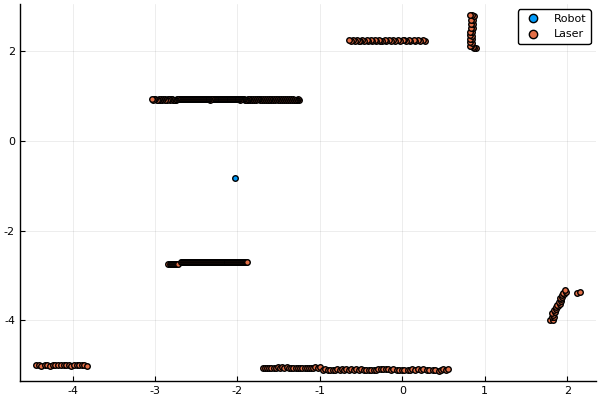

In [10]:
Lg = T * L

laser_Xg = Lg[1, :]
laser_Yg = Lg[2, :]

scatter([x], [y], label="Robot")
scatter!(laser_Xg, laser_Yg, label="Laser")

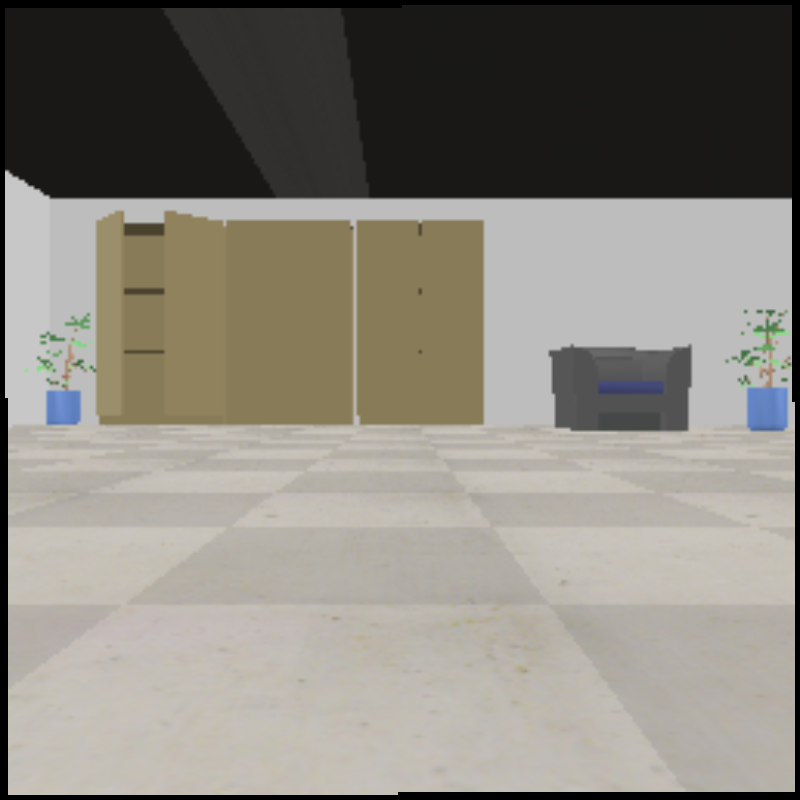

In [11]:
show_vision(robot)

In [12]:
position = get_current_position(robot)
orientation = get_current_orientation(robot)

@show(position)
@show(orientation)

nothing

position = Float32[-2.0253854, -0.824989, 0.13867834]
orientation = Float32[-6.942714e-5, -0.0020159665, -5.538316e-5]


In [13]:
p0 = get_current_position(robot)
a0 = get_current_orientation(robot)

@show(p0)
@show(a0)

set_velocity(robot, 0.1, 0)

sleep(5)

stop(robot)

p1 = get_current_position(robot)
a1 = get_current_orientation(robot)

@show(p1)
@show(a1)

nothing

p0 = Float32[-2.0253854, -0.824989, 0.13867834]
a0 = Float32[-6.942714e-5, -0.0020159665, -5.538316e-5]
p1 = Float32[-1.9039482, -0.8250371, 0.13867337]
a1 = Float32[-6.377567e-5, -0.0021159379, -0.00028104807]


In [14]:
reset_simulation()

robot = Robot()

p2 = get_current_position(robot)
a2 = get_current_orientation(robot)

@show(p0)
@show(p1)
@show(p2)

@show(a0)
@show(a1)
@show(a2)

nothing

Simulation stopped...
Simulation started...
Connected to remoteApi server.
Pioneer_p3dx_ultrasonicSensor1 connected.
Pioneer_p3dx_ultrasonicSensor2 connected.
Pioneer_p3dx_ultrasonicSensor3 connected.
Pioneer_p3dx_ultrasonicSensor4 connected.
Pioneer_p3dx_ultrasonicSensor5 connected.
Pioneer_p3dx_ultrasonicSensor6 connected.
Pioneer_p3dx_ultrasonicSensor7 connected.
Pioneer_p3dx_ultrasonicSensor8 connected.
Pioneer_p3dx_ultrasonicSensor9 connected.
Pioneer_p3dx_ultrasonicSensor10 connected.
Pioneer_p3dx_ultrasonicSensor11 connected.
Pioneer_p3dx_ultrasonicSensor12 connected.
Pioneer_p3dx_ultrasonicSensor13 connected.
Pioneer_p3dx_ultrasonicSensor14 connected.
Pioneer_p3dx_ultrasonicSensor15 connected.
Pioneer_p3dx_ultrasonicSensor16 connected.
Laser connected.
Vision sensor connected.
Left motor connected.
Right motor connected.
Robot connected.
p0 = Float32[-2.0253854, -0.824989, 0.13867834]
p1 = Float32[-1.9039482, -0.8250371, 0.13867337]
p2 = Float32[-2.0252995, -0.82498246, 0.13867